# **1. Entendimiento del Negocio**

La unidad de psicología de un hospital universitario quiere entender los patrones y efectos sobre el uso de SmartPhones entre los jóvenes, haciendo un enfoque especial en entender niveles de adicción al uso de este tipo de dispositivos. La intención es entonces conocer cuáles pueden ser los efectos en cuanto a la posibilidad de desarrollar niveles de adicción.

# **2. Enfoque Analítico**

Desarrollar un experimento de clasificación que permita determinar los niveles de adicción de jóvenes con un nivel de desempeño superior al 85%

# **3. Requerimiento de Datos**

- Datos comportamentales
- Datos demográficos
- Datos de hábitos
- Nivel de adicción

# **4. Recolección de los Datos**

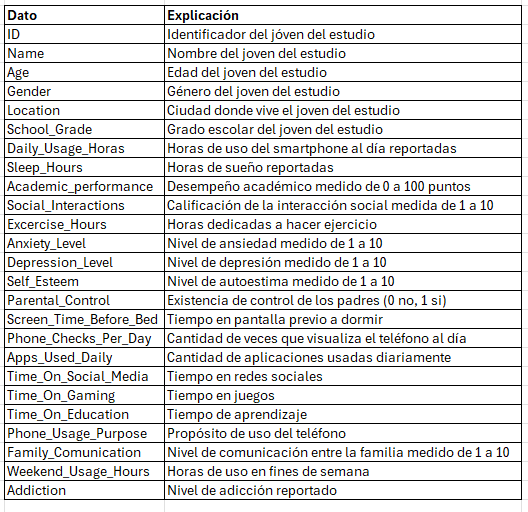

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('../Datasets/data_clf.csv')
data

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78.0,5.0,...,1.4,86,19.0,3.6,1.7,1.2,Browsing,4.0,8.7,High
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70.0,5.0,...,0.9,96,9.0,1.1,4.0,1.8,Browsing,2.0,5.3,High
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93.0,8.0,...,0.5,137,8.0,0.3,1.5,0.4,Education,6.0,5.7,High
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78.0,8.0,...,1.4,128,7.0,3.1,1.6,0.8,Social Media,8.0,3.0,High
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56.0,4.0,...,1.0,96,20.0,2.6,0.9,1.1,Gaming,10.0,3.7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53.0,4.0,...,0.3,80,15.0,2.7,1.8,1.0,NaN,8.0,9.4,High
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93.0,5.0,...,0.9,45,8.0,3.1,0.0,0.3,Gaming,9.0,5.2,Medium
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98.0,1.0,...,0.2,51,13.0,2.4,0.2,2.4,Social Media,9.0,5.9,Medium
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67.0,3.0,...,1.6,125,17.0,1.7,2.6,1.5,Browsing,4.0,6.1,High


# **5. Entendimiento de los datos**

- Datos nulos
- Estadísticas univariada, bivariada y multivariada
- Desbalance de y

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Identificación de datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       2900 non-null   float64
 7   Sleep_Hours             2900 non-null   float64
 8   Academic_Performance    2900 non-null   float64
 9   Social_Interactions     2900 non-null   float64
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           2900 non-null   float64
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        2900 non-null   

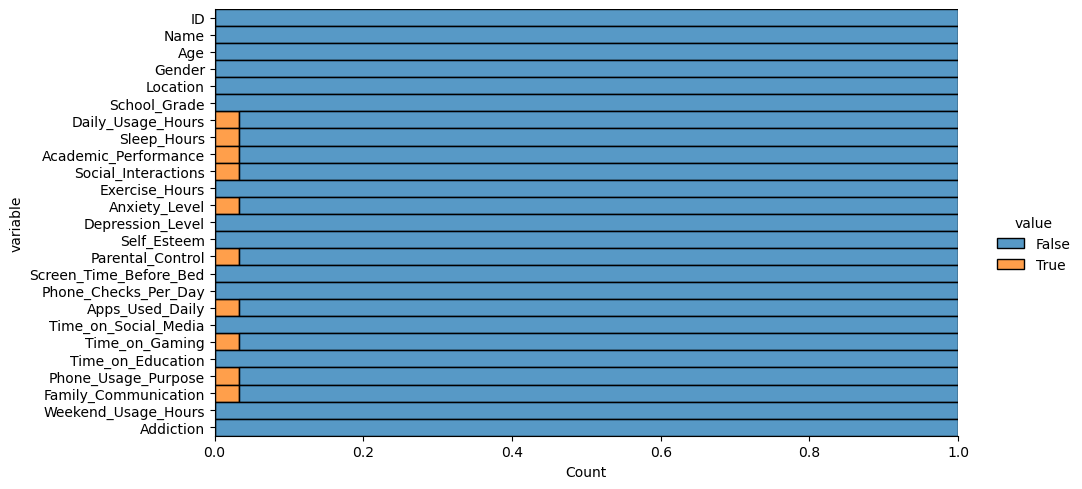

In [4]:
#Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

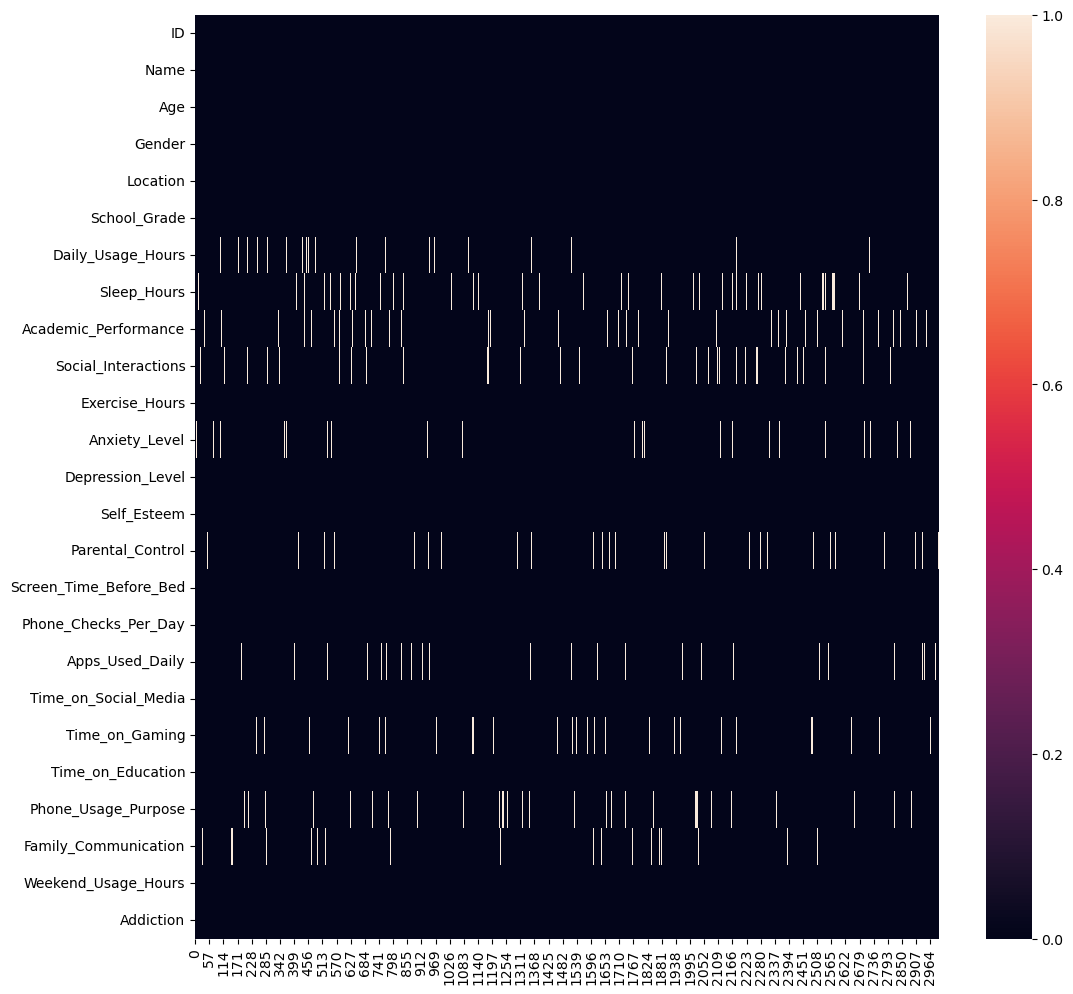

In [5]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

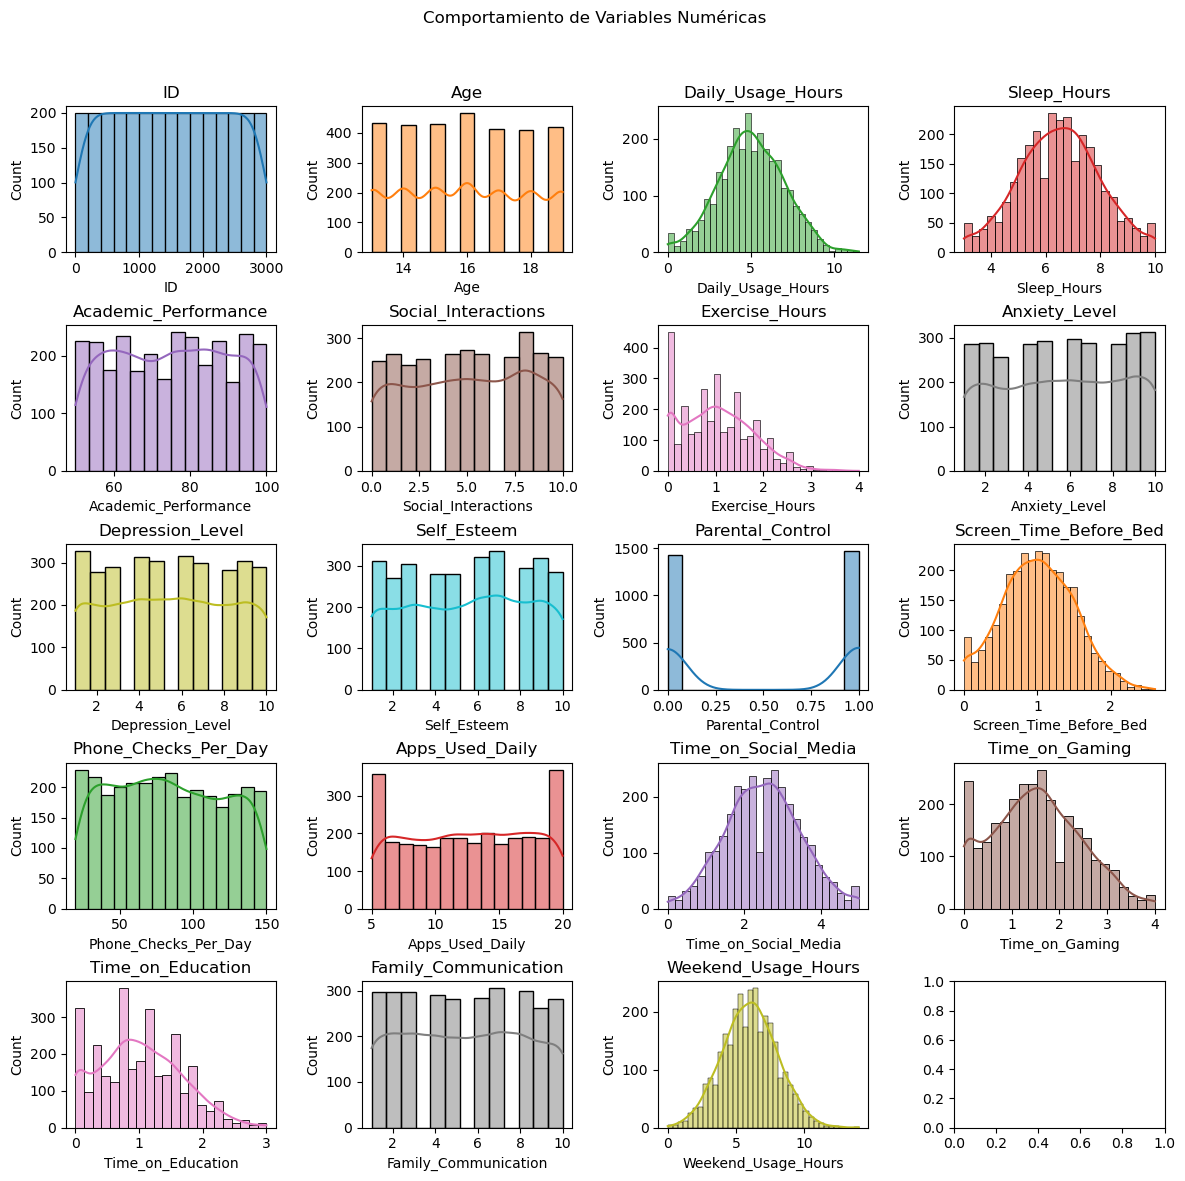

In [6]:
###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(5, 4, figsize = (12, 12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

ACADEMIC_Performance: Multimodales no paramétricas

no son continuas (Niveles determinados)

Los usos por hora son normales, están relacionados los específicos con el general

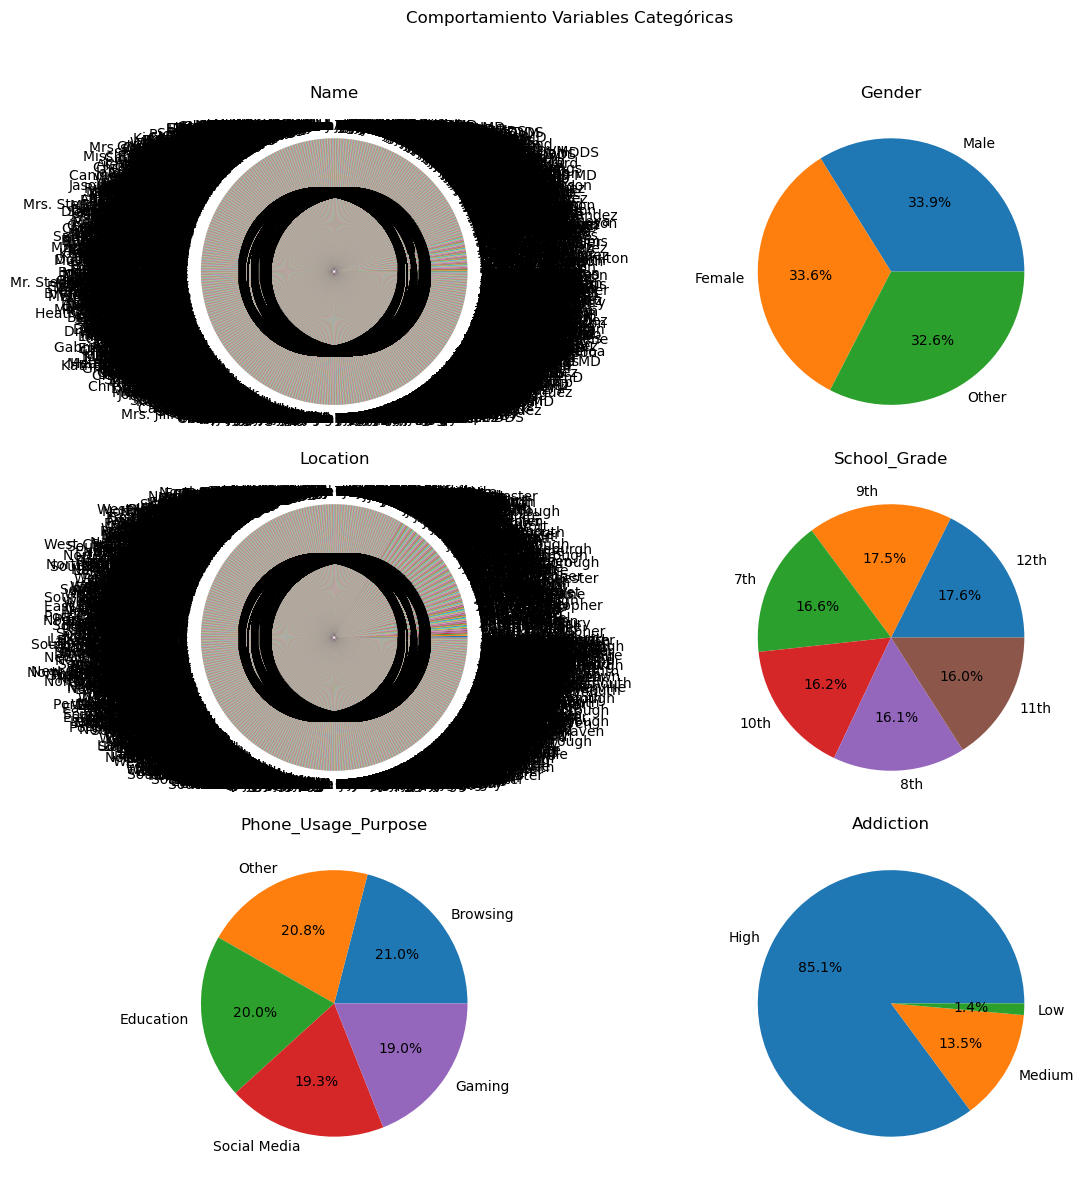

In [7]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(3, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

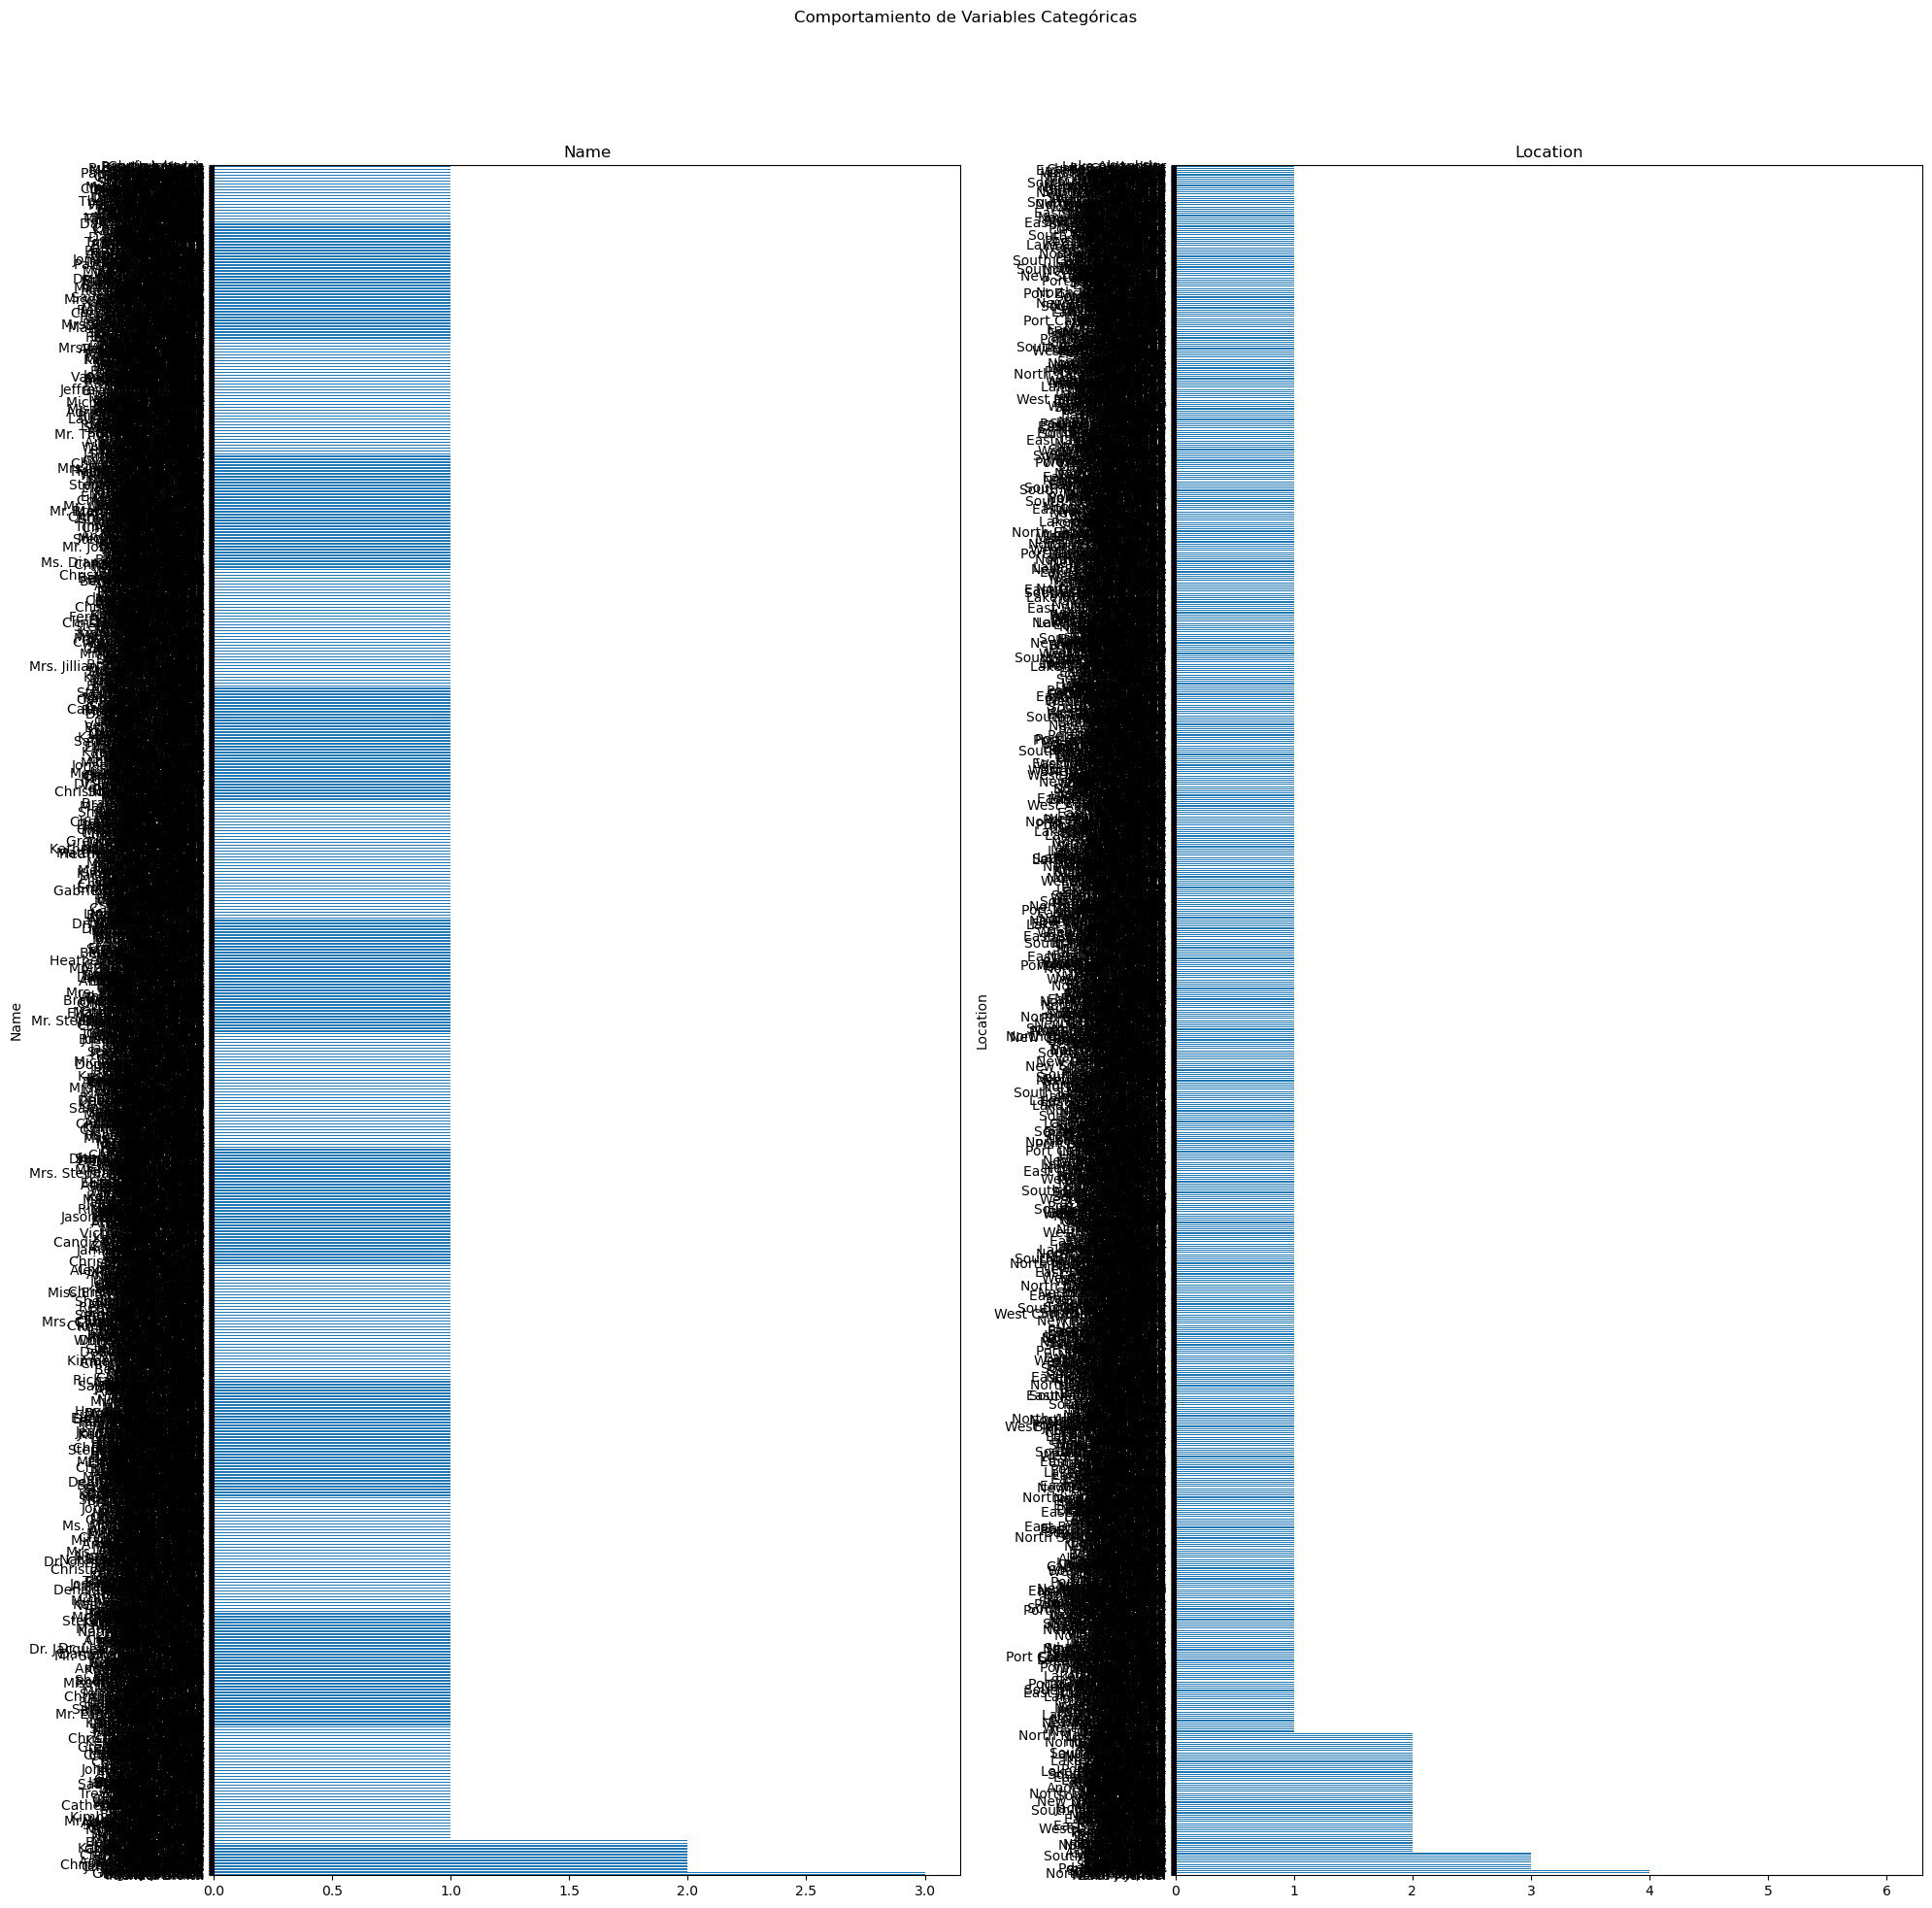

In [8]:
##Gráfico de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax = ax.flat

col = data[['Name', 'Location']]
for i, col in enumerate(col):
    data[col].value_counts().plot.barh(ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Categóricas')
plt.show()

# **6. Preparación de los Datos**

- Eliminar variables que no son significativas
- Completar variables que cuentan con datos nulos
- Balancear `y`
- Transformar los datos para que sean usables por el modelo
- Separar en conjuntos de entrenamiento y prueba

In [9]:
data_mod = data.drop(columns = ['ID', 'Name', 'Location', 'Age'])
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   object 
 1   School_Grade            3000 non-null   object 
 2   Daily_Usage_Hours       2900 non-null   float64
 3   Sleep_Hours             2900 non-null   float64
 4   Academic_Performance    2900 non-null   float64
 5   Social_Interactions     2900 non-null   float64
 6   Exercise_Hours          3000 non-null   float64
 7   Anxiety_Level           2900 non-null   float64
 8   Depression_Level        3000 non-null   int64  
 9   Self_Esteem             3000 non-null   int64  
 10  Parental_Control        2900 non-null   float64
 11  Screen_Time_Before_Bed  3000 non-null   float64
 12  Phone_Checks_Per_Day    3000 non-null   int64  
 13  Apps_Used_Daily         2900 non-null   float64
 14  Time_on_Social_Media    3000 non-null   

Transformar de maner ordinal las variables categóricas con miras imputar los datos

In [10]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

In [11]:
categorical_cols = data_mod.select_dtypes(include = ['object']).columns
categorical_transformer = make_column_transformer((OrdinalEncoder(), categorical_cols),remainder='passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['Gender', 'School_Grade', 'Phone_Usage_Purpose', 'Addiction'], dtype='object'))])

In [12]:
data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data_mod),
                                columns = categorical_transformer.get_feature_names_out(),
                                index = data_mod.index).rename(columns = lambda x: x.removeprefix('ordinalencoder__')).rename(columns = lambda x: x.removeprefix ('remainder__'))

data_transformed

,Gender,School_Grade,Phone_Usage_Purpose,Addiction,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours
0,0.0,5.0,0.0,0.0,4.0,6.1,78.0,5.0,0.1,10.0,...,8.0,0.0,1.4,86.0,19.0,3.6,1.7,1.2,4.0,8.7
1,0.0,3.0,0.0,0.0,5.5,6.5,70.0,5.0,0.0,3.0,...,3.0,0.0,0.9,96.0,9.0,1.1,4.0,1.8,2.0,5.3
2,2.0,1.0,1.0,0.0,5.8,5.5,93.0,8.0,0.8,2.0,...,10.0,NaN,0.5,137.0,8.0,0.3,1.5,0.4,6.0,5.7
3,0.0,2.0,4.0,0.0,3.1,3.9,78.0,8.0,1.6,9.0,...,3.0,0.0,1.4,128.0,7.0,3.1,1.6,0.8,8.0,3.0
4,2.0,5.0,2.0,0.0,2.5,6.7,56.0,4.0,1.1,1.0,...,1.0,0.0,1.0,96.0,20.0,2.6,0.9,1.1,10.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,2.0,NaN,0.0,3.9,6.4,53.0,4.0,0.9,7.0,...,2.0,1.0,0.3,80.0,15.0,2.7,1.8,1.0,8.0,9.4
2996,0.0,4.0,2.0,2.0,3.6,7.3,93.0,5.0,0.0,8.0,...,9.0,1.0,0.9,45.0,8.0,3.1,0.0,0.3,9.0,5.2
2997,2.0,3.0,4.0,2.0,3.2,6.5,98.0,1.0,0.0,4.0,...,9.0,NaN,0.2,51.0,13.0,2.4,0.2,2.4,9.0,5.9
2998,0.0,5.0,0.0,0.0,6.7,7.5,67.0,3.0,0.2,3.0,...,9.0,0.0,1.6,125.0,17.0,1.7,2.6,1.5,4.0,6.1


In [13]:
from sklearn.impute import KNNImputer

In [14]:
# Imputación por vecindad
knn_imputer = KNNImputer(n_neighbors= 10)
data_knn = pd.DataFrame(knn_imputer.fit_transform(data_transformed).round(),
                        columns= data_transformed.columns,
                        index = data_transformed.index)

data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   float64
 1   School_Grade            3000 non-null   float64
 2   Phone_Usage_Purpose     3000 non-null   float64
 3   Addiction               3000 non-null   float64
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   float64
 7   Social_Interactions     3000 non-null   float64
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   float64
 10  Depression_Level        3000 non-null   float64
 11  Self_Esteem             3000 non-null   float64
 12  Parental_Control        3000 non-null   float64
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [16]:
# Imputación recursiva
recursive_imputer = IterativeImputer(estimator= LinearRegression(),
                                     initial_strategy= 'mean',
                                     max_iter=10)

data_recursive = pd.DataFrame(recursive_imputer.fit_transform(data_transformed).round(),
                              columns= data_transformed.columns,
                              index= data_transformed.index)

data_recursive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   float64
 1   School_Grade            3000 non-null   float64
 2   Phone_Usage_Purpose     3000 non-null   float64
 3   Addiction               3000 non-null   float64
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   float64
 7   Social_Interactions     3000 non-null   float64
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   float64
 10  Depression_Level        3000 non-null   float64
 11  Self_Esteem             3000 non-null   float64
 12  Parental_Control        3000 non-null   float64
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

In [17]:
data_recursive

,Gender,School_Grade,Phone_Usage_Purpose,Addiction,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours
0,0.0,5.0,0.0,0.0,4.0,6.0,78.0,5.0,0.0,10.0,...,8.0,0.0,1.0,86.0,19.0,4.0,2.0,1.0,4.0,9.0
1,0.0,3.0,0.0,0.0,6.0,6.0,70.0,5.0,0.0,3.0,...,3.0,0.0,1.0,96.0,9.0,1.0,4.0,2.0,2.0,5.0
2,2.0,1.0,1.0,0.0,6.0,6.0,93.0,8.0,1.0,2.0,...,10.0,1.0,0.0,137.0,8.0,0.0,2.0,0.0,6.0,6.0
3,0.0,2.0,4.0,0.0,3.0,4.0,78.0,8.0,2.0,9.0,...,3.0,0.0,1.0,128.0,7.0,3.0,2.0,1.0,8.0,3.0
4,2.0,5.0,2.0,0.0,2.0,7.0,56.0,4.0,1.0,1.0,...,1.0,0.0,1.0,96.0,20.0,3.0,1.0,1.0,10.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,2.0,2.0,0.0,4.0,6.0,53.0,4.0,1.0,7.0,...,2.0,1.0,0.0,80.0,15.0,3.0,2.0,1.0,8.0,9.0
2996,0.0,4.0,2.0,2.0,4.0,7.0,93.0,5.0,0.0,8.0,...,9.0,1.0,1.0,45.0,8.0,3.0,0.0,0.0,9.0,5.0
2997,2.0,3.0,4.0,2.0,3.0,6.0,98.0,1.0,0.0,4.0,...,9.0,1.0,0.0,51.0,13.0,2.0,0.0,2.0,9.0,6.0
2998,0.0,5.0,0.0,0.0,7.0,8.0,67.0,3.0,0.0,3.0,...,9.0,0.0,2.0,125.0,17.0,2.0,3.0,2.0,4.0,6.0


In [18]:
data_imputed = data_recursive.copy()
data_imputed[categorical_cols] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = data_recursive[categorical_cols]))

In [19]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   object 
 1   School_Grade            3000 non-null   object 
 2   Phone_Usage_Purpose     3000 non-null   object 
 3   Addiction               3000 non-null   object 
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   float64
 7   Social_Interactions     3000 non-null   float64
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   float64
 10  Depression_Level        3000 non-null   float64
 11  Self_Esteem             3000 non-null   float64
 12  Parental_Control        3000 non-null   float64
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

## Balanceo

In [20]:
data_high = data_imputed[data_imputed["Addiction"] == "High"]
data_medium = data_imputed[data_imputed["Addiction"] == "Medium"]
data_low = data_imputed[data_imputed["Addiction"] == "Low"]

print(f'El tamaño de la clase High es: {data_high.shape[0]}')
print(f'El tamaño de la clase Medium es: {data_medium.shape[0]}')
print(f'El tamaño de la clase Low es: {data_low.shape[0]}')

El tamaño de la clase High es: 2554
El tamaño de la clase Medium es: 404
El tamaño de la clase Low es: 42


In [21]:
data_medium_re = data_medium.sample(data_high.shape[0], replace = True)
data_low_re = data_low.sample(data_high.shape[0], replace = True)

data_balanced = pd.concat([data_high, data_medium_re, data_low_re])
data_balanced.reset_index(drop=True, inplace=True)
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7662 non-null   object 
 1   School_Grade            7662 non-null   object 
 2   Phone_Usage_Purpose     7662 non-null   object 
 3   Addiction               7662 non-null   object 
 4   Daily_Usage_Hours       7662 non-null   float64
 5   Sleep_Hours             7662 non-null   float64
 6   Academic_Performance    7662 non-null   float64
 7   Social_Interactions     7662 non-null   float64
 8   Exercise_Hours          7662 non-null   float64
 9   Anxiety_Level           7662 non-null   float64
 10  Depression_Level        7662 non-null   float64
 11  Self_Esteem             7662 non-null   float64
 12  Parental_Control        7662 non-null   float64
 13  Screen_Time_Before_Bed  7662 non-null   float64
 14  Phone_Checks_Per_Day    7662 non-null   

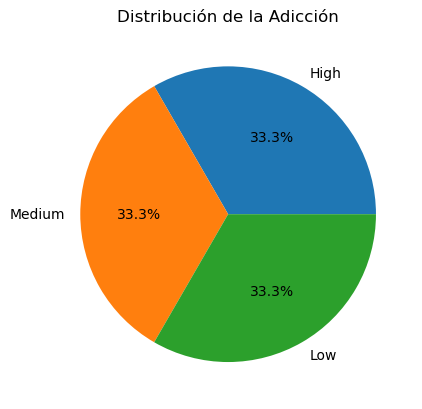

In [22]:
plt.pie(data_balanced["Addiction"].value_counts(), labels=data_balanced["Addiction"].value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de la Adicción")
plt.show()

In [23]:
X = data_balanced.drop(columns = ['Addiction'], axis = 1)
y = data_balanced[['Addiction']]

print(f'El tamaño de X es: {X.shape}')
print(f'El tamaño de y es: {y.shape}')

El tamaño de X es: (7662, 20)
El tamaño de y es: (7662, 1)


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [62]:
num_col = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = X.select_dtypes(include = ['object']).columns.to_list()

numtrans = Pipeline(steps=[("scale", MinMaxScaler())])
cattrans = Pipeline(steps=[("encoder", OneHotEncoder(sparse_output=True))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numtrans, num_col),
        ('cat', cattrans, cat_col)
    ],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 ['Daily_Usage_Hours', 'Sleep_Hours',
                                  'Academic_Performance', 'Social_Interactions',
                                  'Exercise_Hours', 'Anxiety_Level',
                                  'Depression_Level', 'Self_Esteem',
                                  'Parental_Control', 'Screen_Time_Before_Bed',
                                  'Phone_Checks_Per_Day', 'Apps_Used_Daily',
                                  'Time_on_Social_Media', 'Time_on_Gaming',
                                  'Time_on_Education', 'Family_Communication',
                                  'Weekend_Usage_Hours']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'School_Grade',
                                  'Phone_Usage_Purpose'])])

In [63]:
X_pre = preprocessor.fit_transform(X)
cod_cat = preprocessor.named_transformers_['cat']["encoder"].get_feature_names_out(cat_col)
labels = np.concatenate((num_col, cod_cat))
X_pro = pd.DataFrame(X_pre, columns=labels)
X_pro.head(10)

,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,...,School_Grade_11th,School_Grade_12th,School_Grade_7th,School_Grade_8th,School_Grade_9th,Phone_Usage_Purpose_Browsing,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,0.333333,0.428571,0.56,0.5,0.00,1.000000,0.222222,0.777778,0.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.500000,0.428571,0.40,0.5,0.00,0.222222,0.666667,0.222222,0.0,0.333333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.500000,0.428571,0.86,0.8,0.25,0.111111,0.222222,1.000000,1.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.250000,0.142857,0.56,0.8,0.50,0.888889,1.000000,0.222222,0.0,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.166667,0.571429,0.12,0.4,0.25,0.000000,0.444444,0.000000,0.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.333333,0.428571,0.78,0.3,0.25,0.555556,0.000000,0.222222,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.500000,0.571429,0.78,0.3,0.25,0.555556,0.666667,0.888889,0.0,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.416667,0.428571,0.40,0.2,0.50,0.444444,0.555556,0.777778,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.250000,0.857143,0.58,0.0,0.50,0.000000,0.666667,0.555556,0.0,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.333333,0.428571,0.78,0.8,0.25,0.888889,0.000000,0.888889,0.0,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size=0.7, random_state=123)

print(f'El Tamaño de X_train es: {X_train.shape}')
print(f'El Tamaño de X_test es: {X_test.shape}')
print(f'El Tamaño de y_train es: {y_train.shape}')
print(f'El Tamaño de y_test es: {y_test.shape}')

El Tamaño de X_train es: (5363, 31)
El Tamaño de X_test es: (2299, 31)
El Tamaño de y_train es: (5363, 1)
El Tamaño de y_test es: (2299, 1)


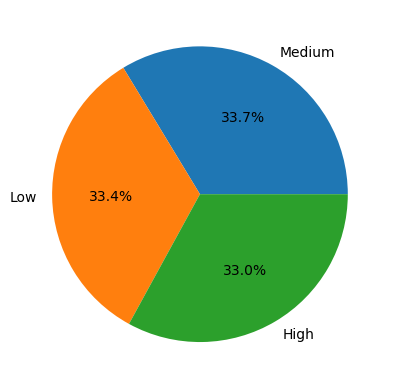

In [29]:
plt.pie(y_train["Addiction"].value_counts(), labels=y_train["Addiction"].value_counts().index, autopct='%1.1f%%')
plt.show()

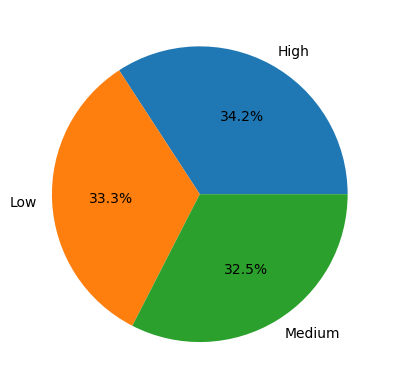

In [30]:
plt.pie(y_test["Addiction"].value_counts(), labels=y_test["Addiction"].value_counts().index, autopct='%1.1f%%')
plt.show()

## Modelos

### Regresión Logística

- Regularización
- Solver
- C

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Grid: Exhaustiva, Random: Aleatorizada

In [ ]:
modelo_1 = LogisticRegression(solver = 'saga', random_state=123)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# 8 (C) * 3 (Hiper) - CV: 5 (Folds 5~10)
clf_1 = GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5, scoring='accuracy')
clf_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [33]:
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']), 
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['accuracy'])],
                       axis=1)
validation.sort_values(by='accuracy', ascending=False)

,C,penalty,accuracy
22,1000.0000,l2,0.920192
18,100.0000,l1,0.920006
21,1000.0000,l1,0.920006
15,10.0000,l1,0.917955
19,100.0000,l2,0.917769
16,10.0000,l2,0.914784
12,1.0000,l1,0.912546
9,0.1000,l1,0.906768
13,1.0000,l2,0.905463
10,0.1000,l2,0.864996


In [34]:
modelo_1_final = clf_1.best_estimator_
modelo_1_final

LogisticRegression(C=1000, random_state=123, solver='saga')

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

Metricas de Desempeño de Entrenamiento
              precision    recall  f1-score   support

        High       0.97      0.95      0.96      1768
         Low       0.91      0.95      0.93      1789
      Medium       0.90      0.88      0.89      1806

    accuracy                           0.93      5363
   macro avg       0.93      0.93      0.93      5363
weighted avg       0.93      0.93      0.93      5363

Matriz de Confusión de Entrenamiento


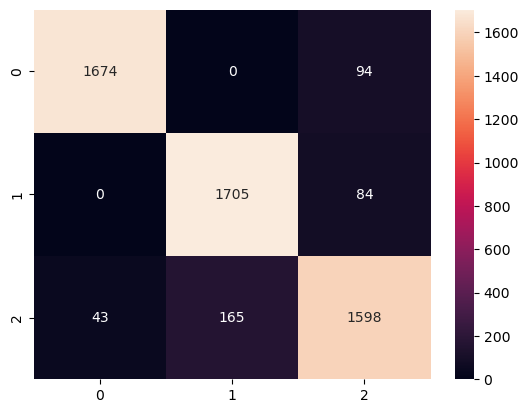

In [ ]:
y_pred_1_train = modelo_1_final.predict(X_train)
print('Metricas de Desempeño de Entrenamiento')
print(classification_report(y_train, y_pred_1_train))
print('Matriz de Confusión de Entrenamiento')
sns.heatmap(confusion_matrix(y_train, y_pred_1_train), annot=True, fmt='d')
plt.show()

Metricas de Desempeño de Prueba
              precision    recall  f1-score   support

        High       0.97      0.94      0.95       786
         Low       0.91      0.96      0.93       765
      Medium       0.89      0.87      0.88       748

    accuracy                           0.92      2299
   macro avg       0.92      0.92      0.92      2299
weighted avg       0.92      0.92      0.92      2299

Matriz de Confusión de Prueba


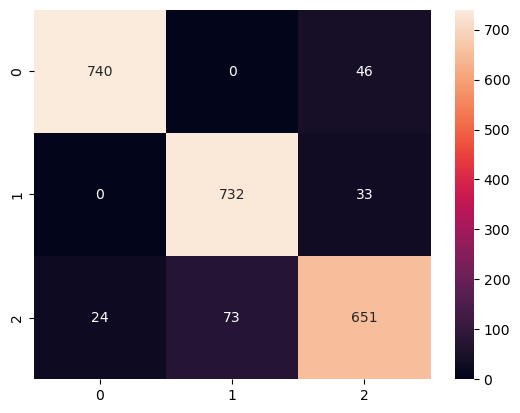

In [37]:
y_pred_1_test = modelo_1_final.predict(X_test)
print('Metricas de Desempeño de Prueba')
print(classification_report(y_test, y_pred_1_test))
print('Matriz de Confusión de Prueba')
sns.heatmap(confusion_matrix(y_test, y_pred_1_test), annot=True, fmt='d')
plt.show()

### K Vecinos Mas Cercanos

- Cantidad de vecinos
- Forma de distancia: Euclideana - Manhattan

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
modelo_2 = KNeighborsClassifier()
# p: 1 (Manhattan) - 2 (Euclidean), n_neighbors: arbitrariamente
param_grid = {'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]}
clf_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]},
             scoring='f1_weighted')

In [40]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']), 
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,n_neighbors,p,f1
0,3,1,0.864362
1,3,2,0.858485
2,5,1,0.819727
3,5,2,0.812281
4,7,1,0.790811
5,7,2,0.772260
6,19,1,0.745362
8,21,1,0.744971
7,19,2,0.704803
9,21,2,0.697736


In [41]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

KNeighborsClassifier(n_neighbors=3, p=1)

Metricas de Desempeño de Entrenamiento
              precision    recall  f1-score   support

        High       0.99      0.85      0.92      1768
         Low       0.99      1.00      0.99      1789
      Medium       0.88      0.99      0.93      1806

    accuracy                           0.95      5363
   macro avg       0.95      0.95      0.95      5363
weighted avg       0.95      0.95      0.95      5363

Matriz de Confusión de Entrenamiento


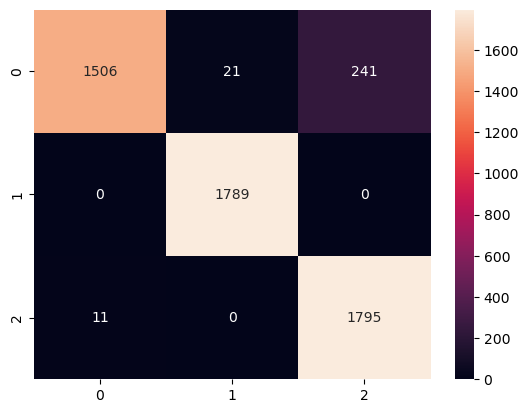

In [42]:
y_pred_2_train = modelo_2_final.predict(X_train)
print('Metricas de Desempeño de Entrenamiento')
print(classification_report(y_train, y_pred_2_train))
print('Matriz de Confusión de Entrenamiento')
sns.heatmap(confusion_matrix(y_train, y_pred_2_train), annot=True, fmt='d')
plt.show()

Metricas de Desempeño de Prueba
              precision    recall  f1-score   support

        High       0.97      0.73      0.83       786
         Low       0.98      1.00      0.99       765
      Medium       0.78      0.97      0.87       748

    accuracy                           0.90      2299
   macro avg       0.91      0.90      0.90      2299
weighted avg       0.91      0.90      0.90      2299

Matriz de Confusión de Prueba


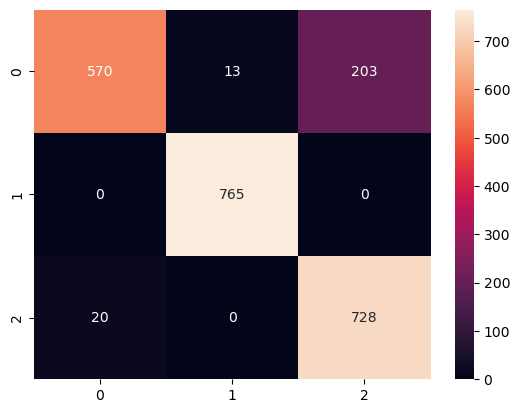

In [43]:
y_pred_2_test = modelo_2_final.predict(X_test)
print('Metricas de Desempeño de Prueba')
print(classification_report(y_test, y_pred_2_test))
print('Matriz de Confusión de Prueba')
sns.heatmap(confusion_matrix(y_test, y_pred_2_test), annot=True, fmt='d')
plt.show()

### Maquinas de Soporte Vectorial

- C -> 0: menor penalización (El vector soporte es mayor, más lejano a la línea recta)
- C -> inf: mayor penalización (El vector soporte es menor, más cercano a la línea recta), reduce la posibilidad de cometer errores
- Kernel

In [45]:
from sklearn.svm import SVC

In [46]:
modelo_3 = SVC(random_state=123)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[2, 3, 4]}
clf_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=123),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1_weighted')

In [47]:
validation = pd.concat([pd.DataFrame(clf_3.cv_results_['params']), 
                        pd.DataFrame(clf_3.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,C,degree,kernel,f1
74,100.0000,2,rbf,0.983951
90,1000.0000,3,rbf,0.983951
78,100.0000,3,rbf,0.983951
86,1000.0000,2,rbf,0.983951
82,100.0000,4,rbf,0.983951
...,...,...,...,...
13,0.0010,2,poly,0.169668
14,0.0010,2,rbf,0.169668
15,0.0010,2,sigmoid,0.169668
22,0.0010,4,rbf,0.169668


In [48]:
modelo_3_final = clf_3.best_estimator_
modelo_3_final

SVC(C=100, degree=2, random_state=123)

Metricas de Desempeño de Entrenamiento
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1768
         Low       1.00      1.00      1.00      1789
      Medium       1.00      1.00      1.00      1806

    accuracy                           1.00      5363
   macro avg       1.00      1.00      1.00      5363
weighted avg       1.00      1.00      1.00      5363

Matriz de Confusión de Entrenamiento


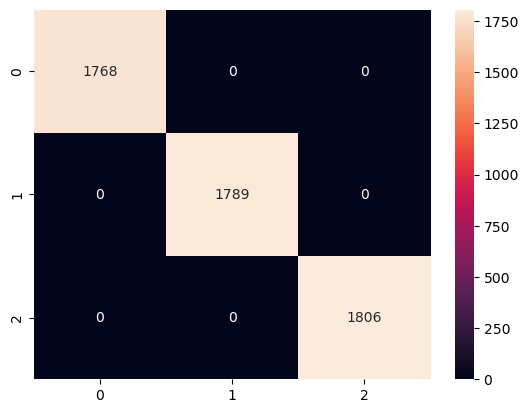

In [49]:
y_pred_3_train = modelo_3_final.predict(X_train)
print('Metricas de Desempeño de Entrenamiento')
print(classification_report(y_train, y_pred_3_train))
print('Matriz de Confusión de Entrenamiento')
sns.heatmap(confusion_matrix(y_train, y_pred_3_train), annot=True, fmt='d')
plt.show()

Metricas de Desempeño de Prueba
              precision    recall  f1-score   support

        High       0.99      0.95      0.97       786
         Low       1.00      1.00      1.00       765
      Medium       0.95      0.99      0.97       748

    accuracy                           0.98      2299
   macro avg       0.98      0.98      0.98      2299
weighted avg       0.98      0.98      0.98      2299

Matriz de Confusión de Prueba


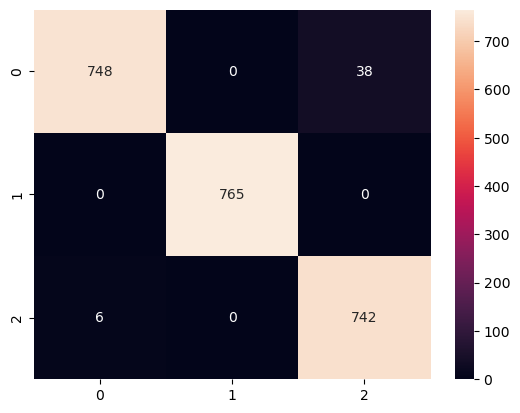

In [50]:
y_pred_3_test = modelo_3_final.predict(X_test)
print('Metricas de Desempeño de Prueba')
print(classification_report(y_test, y_pred_3_test))
print('Matriz de Confusión de Prueba')
sns.heatmap(confusion_matrix(y_test, y_pred_3_test), annot=True, fmt='d')
plt.show()

### Arboles de Decision

lnG(Dp, j): Ganancia de información en un nodo específico
- Función impurez
- Capacidad de crecimiento del arbol: profundidad, cantidad de hojas, relación de clases por hoja

<br>

- Métodos de ensamble

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [53]:
modelo_4 = DecisionTreeClassifier(random_state=123)
param_grid = {'criterion': ['log_loss', 'gini', 'entropy'], 'max_depth':[None, 5, 10, 15, 20], 'max_leaf_nodes':[None, 5, 10, 15, 20], 'min_samples_split': [2, 3, 4]}
clf_4 = GridSearchCV(modelo_4, param_grid, cv=3, scoring='f1_weighted')
clf_4.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_leaf_nodes': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted')

In [54]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']), 
                        pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1
135,gini,20.0,NaN,2,0.961225
120,gini,15.0,NaN,2,0.961225
75,gini,NaN,NaN,2,0.961225
0,log_loss,NaN,NaN,2,0.958742
60,log_loss,20.0,NaN,2,0.958742
...,...,...,...,...,...
109,gini,10.0,5.0,3,0.620795
108,gini,10.0,5.0,2,0.620795
94,gini,5.0,5.0,3,0.620795
93,gini,5.0,5.0,2,0.620795


Profundidad del árbol: 17
 Número de hojas: 234


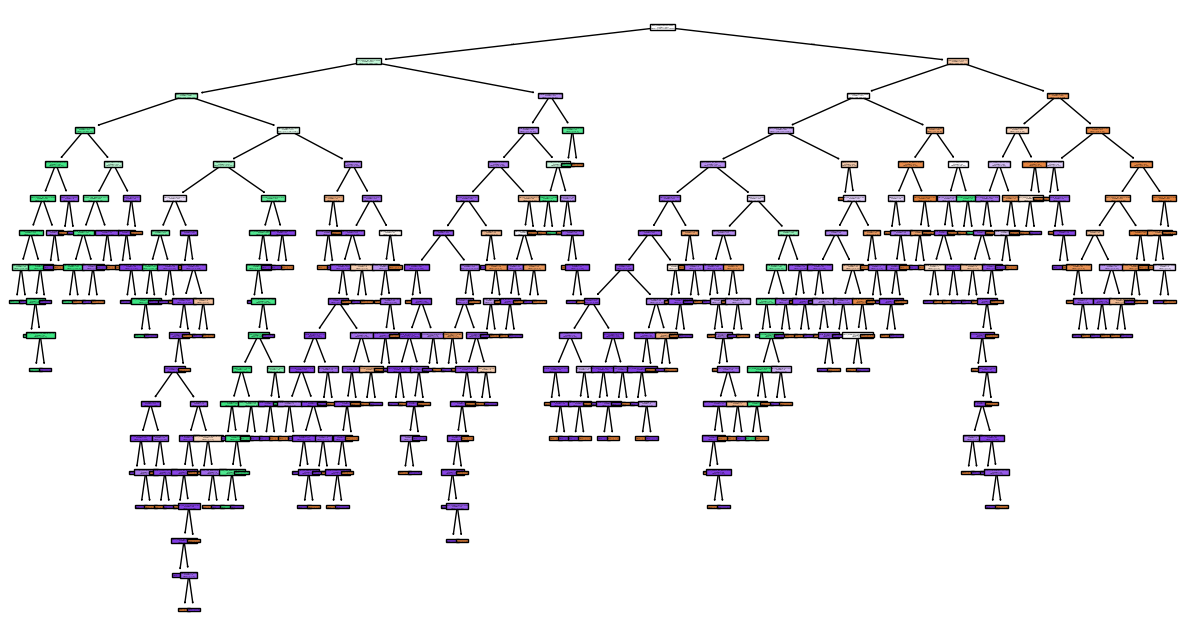

In [59]:
modelo_4_final = clf_4.best_estimator_
fig, ax = plt.subplots(figsize=(15, 8))
print(f"Profundidad del árbol: {modelo_4_final.get_depth()}\n Número de hojas: {modelo_4_final.get_n_leaves()}")
plot = plot_tree(modelo_4_final, feature_names=labels, filled=True, impurity=False, ax=ax)

Metricas de Desempeño de Entrenamiento
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1768
         Low       1.00      1.00      1.00      1789
      Medium       1.00      1.00      1.00      1806

    accuracy                           1.00      5363
   macro avg       1.00      1.00      1.00      5363
weighted avg       1.00      1.00      1.00      5363

Matriz de Confusión de Entrenamiento


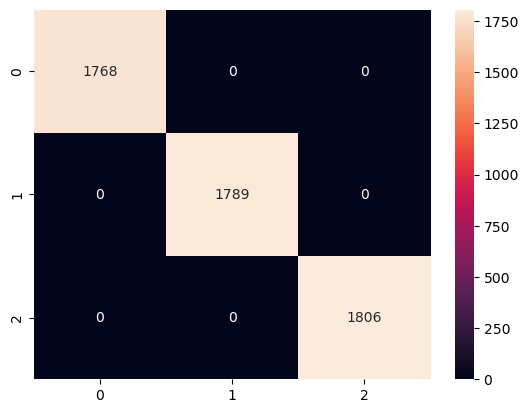

In [57]:
y_pred_4_train = modelo_4_final.predict(X_train)
print('Metricas de Desempeño de Entrenamiento')
print(classification_report(y_train, y_pred_4_train))
print('Matriz de Confusión de Entrenamiento')
sns.heatmap(confusion_matrix(y_train, y_pred_4_train), annot=True, fmt='d')
plt.show()

Metricas de Desempeño de Prueba
              precision    recall  f1-score   support

        High       1.00      0.92      0.96       786
         Low       1.00      1.00      1.00       765
      Medium       0.92      1.00      0.96       748

    accuracy                           0.97      2299
   macro avg       0.97      0.97      0.97      2299
weighted avg       0.97      0.97      0.97      2299

Matriz de Confusión de Prueba


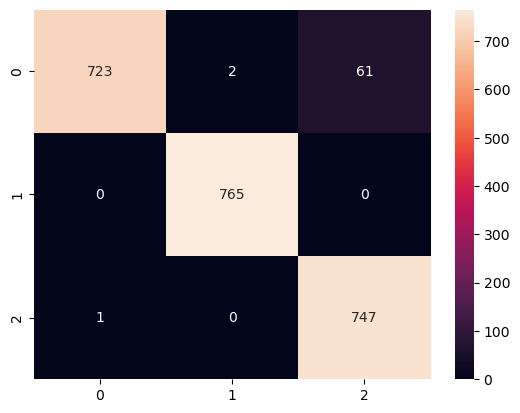

In [58]:
y_pred_4_test = modelo_4_final.predict(X_test)
print('Metricas de Desempeño de Prueba')
print(classification_report(y_test, y_pred_4_test))
print('Matriz de Confusión de Prueba')
sns.heatmap(confusion_matrix(y_test, y_pred_4_test), annot=True, fmt='d')
plt.show()